<a href="https://colab.research.google.com/github/delonfadhil/MachineLearningTasks/blob/main/7thWeekTasks/7_XGBoost_Fadhil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Fadhil Dzikri Aqila

NIM : 1103213136

Lecture 7 : XGB

Dataset : [melb_data.csv](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot)

Dokumentasi ChatGPT : [Link](https://chat.openai.com/share/e7656e55-283d-4a11-9682-5859c7061be0)

Prompt ChatGPT : berikan kode untuk menyambungkan google drive dengan google colab

#Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Prompt ChatGPT :

Bertindaklah sebagai machine learning engineer, buatlah kode python untuk langkah-langkah berikut:

Load dataset melb_data.csv

lakukan feature engineering

visualisasikan data

split data menjadi 70% untuk data train

latih menggunakan xgb, random forest, dan decision tree

evaluasi dengan menggunakan MAE


#Import Library

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset

In [3]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/melb_data.csv')

# Feature engineering (drop missing value)

In [4]:
# Feature engineering
data = data.dropna(axis=0)  # Drop missing values

#Informasi Dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6196 entries, 1 to 15395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6196 non-null   int64  
 1   Suburb         6196 non-null   object 
 2   Address        6196 non-null   object 
 3   Rooms          6196 non-null   int64  
 4   Type           6196 non-null   object 
 5   Price          6196 non-null   float64
 6   Method         6196 non-null   object 
 7   SellerG        6196 non-null   object 
 8   Date           6196 non-null   object 
 9   Distance       6196 non-null   float64
 10  Postcode       6196 non-null   float64
 11  Bedroom2       6196 non-null   float64
 12  Bathroom       6196 non-null   float64
 13  Car            6196 non-null   float64
 14  Landsize       6196 non-null   float64
 15  BuildingArea   6196 non-null   float64
 16  YearBuilt      6196 non-null   float64
 17  CouncilArea    6196 non-null   object 
 18  Lattitude   

In [6]:
data.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [7]:
data.tail()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15388,19732,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,...,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
15389,19733,Williamstown,75 Cecil St,3,h,1050000.0,VB,Williams,29/07/2017,6.8,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
15390,19734,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
15392,19736,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0
15395,19739,Yarraville,54 Pentland Pde,6,h,2450000.0,VB,Village,29/07/2017,6.3,...,3.0,2.0,1087.0,388.50,1920.0,Maribyrnong,-37.81038,144.89389,Western Metropolitan,6543.0


#Visualisasi Data dengan pairplot

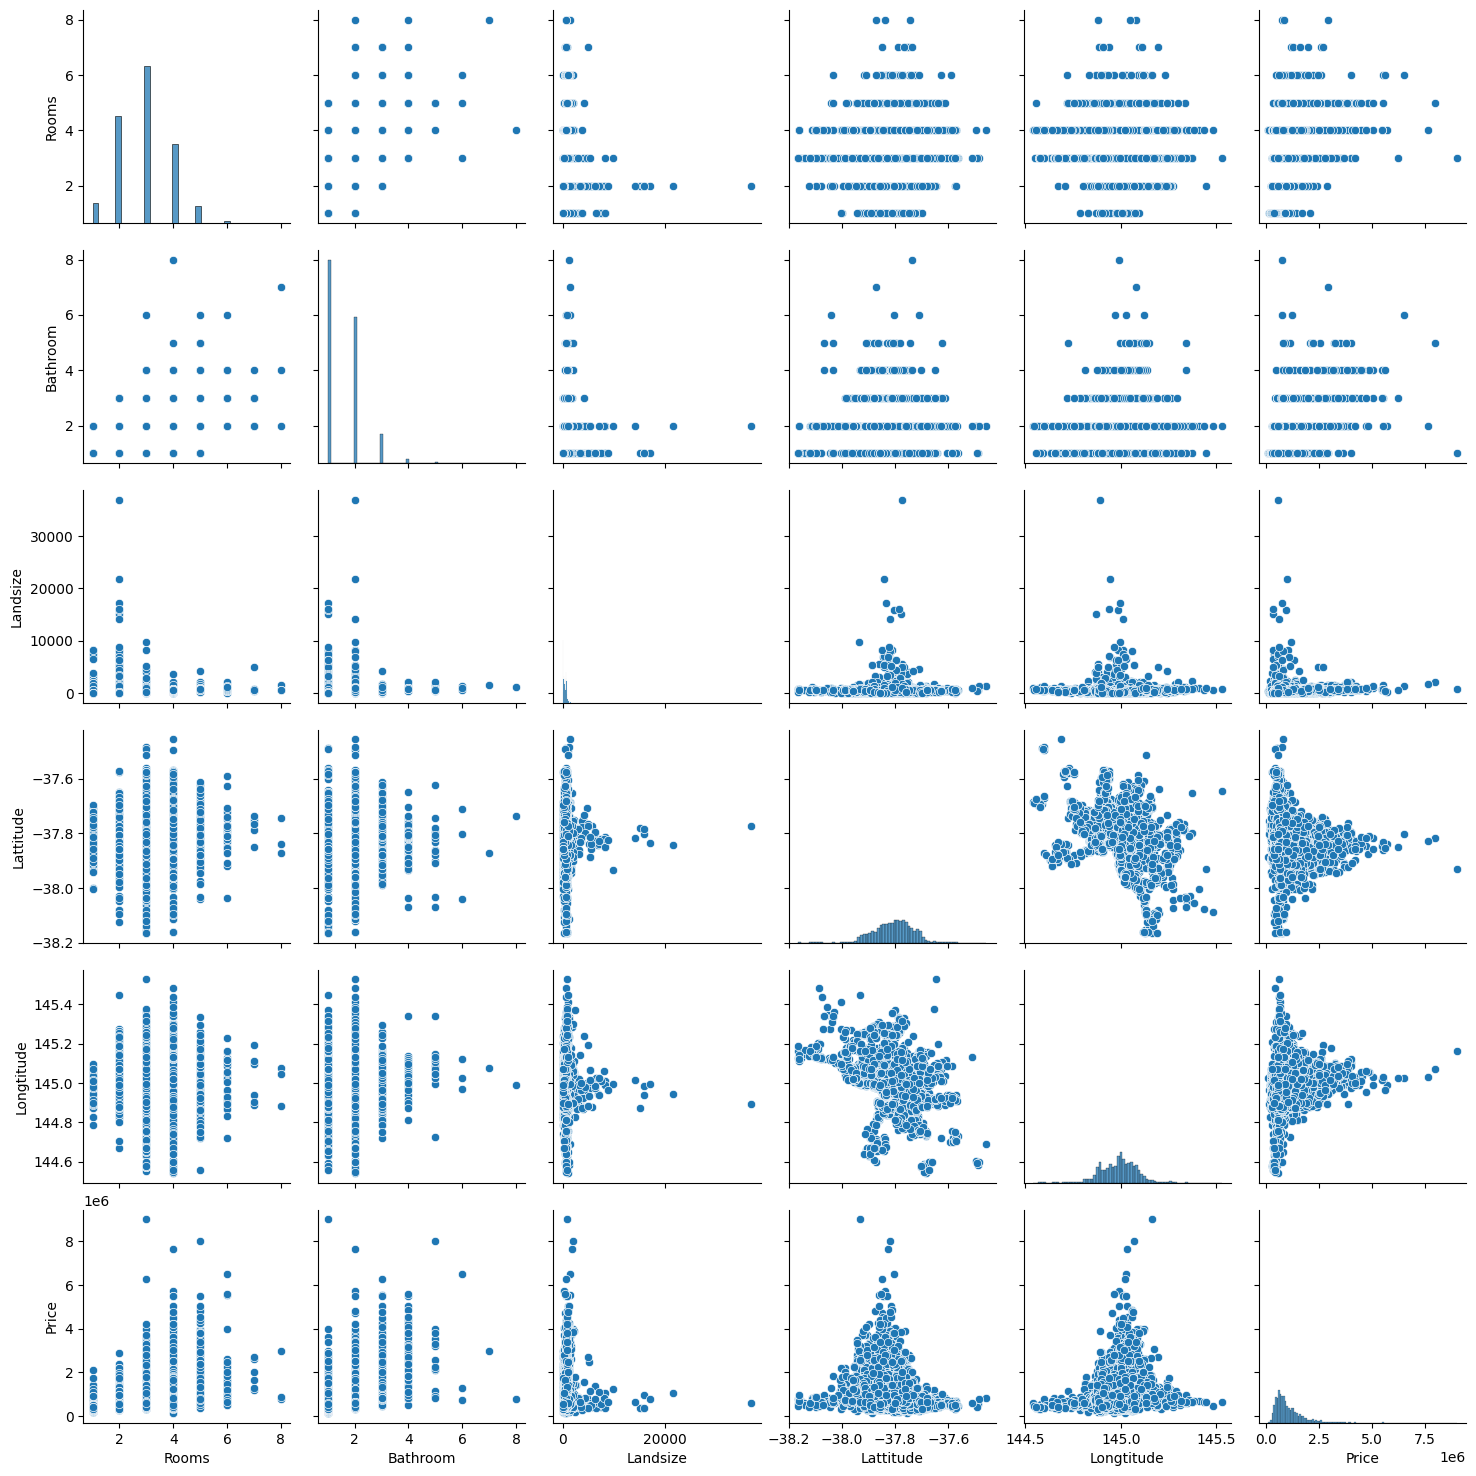

In [8]:
# Visualize data
features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
sns.pairplot(data[features + ['Price']])
plt.show()

#Heatmap Matrix Correlation

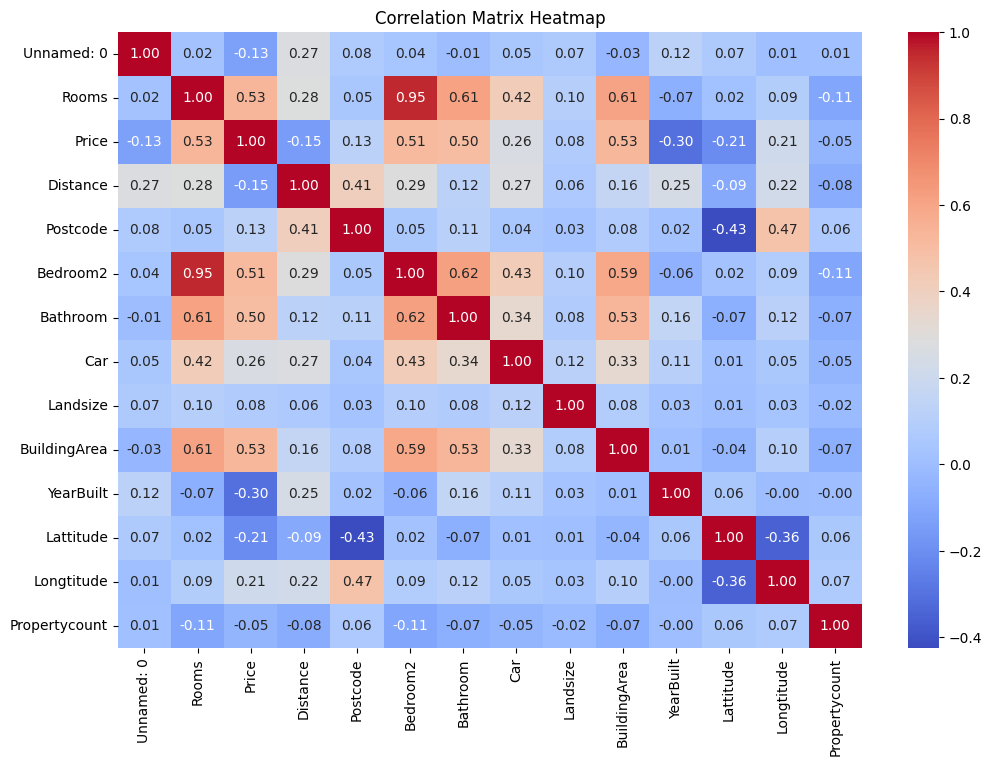

In [11]:
# Select numeric columns for correlation matrix
numeric_cols = data.select_dtypes(include=['number']).columns
corr_matrix = data[numeric_cols].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

#Pelatihan Model (XGBoost, Random Forest dan Decision Tree)

In [14]:
features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = data[features]
y = data['Price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train models
models = {
    'Random Forest': RandomForestRegressor(random_state=0),
    'Decision Tree': DecisionTreeRegressor(random_state=0),
    'XGBoost': XGBRegressor(random_state=0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    print(f'{name} MAE: {mae}')

Random Forest MAE: 207900.1343103051
Decision Tree MAE: 282433.19867312175
XGBoost MAE: 210763.841442812
